# Relación de ejercicios 3

### Lee detenidamente las siguientes instrucciones y borra `raise NotImplementedError` en todas las celdas

En cada trozo de código debes responder a la pregunta formulada, asegurándote de que el resultado queda guardado en la(s) variable(s) indicadas, que por defecto vienen inicializadas a `None`. Puedes usar variables intermedias siempre que el resultado final del cálculo quede guardado exactamente en la variable que indica el enunciado (debes reemplazar `None` el código necesario, pero nunca cambiar el nombre de las variables ya creadas). 

Después de cada ejercicio verás varias líneas de código ya hechas. Ejecútalas todas (no modifiques su código) y te dirán si tu solución es correcta o no, sin darte pistas de cómo se resuelve (el código de los tests no guarda relación con el código de la solución). Si la solución es correcta, no se mostrará nada, pero si es incorrecta, verás un error indicando cuál es el test que tu solución no pasa. Además de esas pruebas, se realizarán algunas más (ocultas) a la hora de puntuar el ejercicio, pero si tu código pasa con éxito las líneas que ves, puedes estar bastante seguro de que tu solución es correcta. Asegúrate de que todas las celdas de auto-evaluación indican que tu solución es correcta antes de subir el ejercicio a la plataforma. En caso contrario, no dudes en preguntar las dudas a través del foro -siempre explicando la duda en palabras, sin pegar código fuente-.

Una vez finalizada la actividad, guarda tu fichero, ciérralo con File -> Close and Halt, y después vuélvelo a abrir y ejecútalo completo pinchando en Cell -> Run All Cells, y asegúrate de que no se lanza ningún error. De esta manera comprobarás que no has olvidado nada y que es posible ejecutarlo completo desde 0 y sin errores. No se corregirá ningún fichero que tenga errores de sintaxis y no se pueda, como mínimo, ejecutar completamente. No pasa nada si alguna de las comprobaciones lanza errores por ser incorrecta, pero el código de cada ejercicio no puede tener errores de sintaxis y debe al menos poderse ejecutar.

RECUERDA SUBIR CADA UNO DE LOS FICHEROS .ipynb TAL CUAL (sueltos), SIN COMPRIMIR Y SIN CAMBIARLES EL NOMBRE. Los ficheros subidos deben tener **exactamente el mismo nombre de fichero que tenían cuando los recibiste**. No subas ningún PDF ni ningún fichero ZIP ni nada similar. La plataforma ya los separa automáticamente en carpetas que traen el nombre y apellidos del alumno, por lo que NO es necesario que lo pongas en ninguna parte.

### Las funciones NUNCA deben hacer print() ni mostrar nada por pantalla, sino devolver el resultado del cálculo utilizando return. Recuerda que imprimir por pantalla no es devolver un resultado.

### **Ejercicio 1 (total: 5 puntos)**

Trabajaremos con el dataset de la sección 6.1 de municipios de España. Puedes encontrar en el esqueleto del primer ejercicio a continuación las sentencias `import` necesarias y el código para leerlo (no debes modificar nada de dicho código).

Para el _geodataframe_ dado, se pide:
    
a) **(2 puntos)** Se pide:
* Realizar un cambio de coordenadas a metros proyectado para WGS84 UTM30N y guardar el nuevo _geodataframe_ en la variable _df_30n_.
* Agrupar (_union_) las secciones censales de cada Comunidad Autónoma, _Cod_CCAA_, y calcular su área en una nueva columna, _area_. Todo ello, en un nuevo _geodataframe_ denominado _df_ccaa_ que *solo* tenga las columnas _Cod_CCAA_, _area_ y _geometry_ (se recomienda investigar la función _dissolve_ de _geopandas_).

In [34]:
import pandas as pd 
import numpy as np  
import geopandas as gpd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

data_location = "/Users/luiscarrillo/OneDrive/Desktop/GitHub/DataScience/Python/Data/88b20013-9bf2-49a1-aca5-fa050c6af11e2020330-1-1pthzga.ys1i.shp"    

# Cambia None por la ruta donde tengas el fichero .shp de municipios de España
# Descomenta el siguiente código cuando hayas puesto la ruta de tu fichero
    
# YOUR CODE HERE
df_sscc = gpd.read_file(data_location)
df_sscc = df_sscc[['Cod_CCAA','PAD_2C02','geometry']]
df_sscc = df_sscc.rename({'PAD_2C02':'tot_pop'}, axis='columns')

df_sscc.crs = "EPSG:4326" # sistema WGS84
dst_crs = "EPSG:32630" # sistema WGS84 UTM30N
df_30n = df_sscc.to_crs(dst_crs) # transformación de coordenadas             

df_ccaa = df_30n.dissolve(by="Cod_CCAA", aggfunc="sum", as_index=False) # agrupación y agregación de datos
df_ccaa["area"] = df_ccaa.geometry.area # cálculo del área de cada polígono
df_ccaa = df_ccaa[["area", "Cod_CCAA", "geometry"]] # selección de columnas
raise NotImplementedError()

NotImplementedError: 

In [35]:
assert (df_ccaa.area[0] > 85000000000) & (df_ccaa.area[0] < 90000000000)
assert (len(df_ccaa) == 19)

b) **(1 punto)** Calcular la densidad de población de cada Comunidad Autónoma y almacenarlo en una nueva columna de `df_ccaa` llamada _densidad_ (habs/km2) sobre _df_ccaa_ (se recomienda utilizar un _pandas.merge_ junto con _df_30n_).

In [36]:
# YOUR CODE HERE

df_pop = df_30n.groupby("Cod_CCAA")["tot_pop"].sum().reset_index()

df_ccaa = pd.merge(df_ccaa, df_pop, on="Cod_CCAA")

df_ccaa["densidad"] = df_ccaa["tot_pop"] / (df_ccaa["area"] / 1e6) # convertir el área de m2 a km2

raise NotImplementedError()

[95.65553162]
46572132.0
47000000


NotImplementedError: 

In [37]:
assert(df_ccaa[df_ccaa.Cod_CCAA=='01'].densidad.values > 95 and df_ccaa[df_ccaa.Cod_CCAA=='01'].densidad.values < 96)
assert(df_ccaa.tot_pop.sum() > 46*10**6 and df_ccaa.tot_pop.sum() < 47*10**6)

c) **(1 punto)** Crear un nuevo geodataframe llamado _df_centr_30n_ donde la geometría sea la del centroide de cada provincia. Además, debe tener la columna _densidad_ con la densidad de cada Comunidad Autónoma.

In [40]:
df_centr_30n = None      # Reemplaza esta línae por las líneas de código adecuadas

# YOUR CODE HERE

df_centr_30n = df_ccaa.copy()
df_centr_30n['geometry'] = df_ccaa['geometry'].centroid
df_centr_30n['densidad'] = df_ccaa['densidad']
raise NotImplementedError()

NotImplementedError: 

In [41]:
assert(round(df_centr_30n["geometry"].x.mean(), 2) == 436692.89 and
       round(df_centr_30n["geometry"].y.mean(), 2) == 4408453.62)

d) **(1 punto)** Crear un _geodataframe_ llamado _df_centr_filt_30n_ con los 10 centroides de mayor densidad del _geodataframe_ anterior.

In [43]:
df_centr_filt_30n = None

# YOUR CODE HERE
df_centr_filt_30n = df_centr_30n.sort_values(by='densidad', ascending=False).head(10)
raise NotImplementedError()

NotImplementedError: 

In [44]:
assert (df_centr_filt_30n[df_centr_filt_30n.Cod_CCAA=='19'].geometry.x.values > 504482 and
        df_centr_filt_30n[df_centr_filt_30n.Cod_CCAA=='19'].geometry.x.values < 504483)
assert (df_centr_filt_30n.densidad.sum() > 13207) & (df_centr_filt_30n.densidad.sum() < 13208)

### **Ejercicio 2 (total: 5 puntos)**

Cargar el dataset `mpg` con `sns.load_dataset("mpg")` y guardarlo en la variable `mpg_df`. El significado de las columnas es el siguiente:

- mpg: miles per (US) gallon. millas recorridas en un galon de gasolina. Mayor mpg implica menor consumo
- cylinders: número de cilindros
- displacement: desplazamiento (pulgadas cúbicas de cilindro)
- horsepower: Horsepower (medida de potencia)
- weight: Peso (en miles de libras)
- acceleration: tiempo requerido para recorrer 1/4 de milla
- model_year: año de fabricación
- origin: país de fabricación
- name: nombre del modelo

Se pide crear los siguientes gráficos a partir de él:

(a) **(1.25 puntos)** Un gráfico que muestre un conjunto de diagramas de caja y bigotes *apilados por origin* (es decir, grupos de 3 diagramas de cajas -boxplots- juntos), y facetados en varios sub-gráficos independientes (uno en cada fila) en base al número de cilindros, dispuestos en tantas filas como cilindros distintos existen. Cada gráfico mostrará en el eje Y la variable de millas recorridas por galón, y en el eje X el año de fabricación. Por tanto, en *cada gráfico* habrá *tantos grupos (de 3 cajas cada uno) como años de fabricación existen*. El gráfico devuelto por la función debe almacenarse en la variable `boxplots_facetados_filas`.

PISTA: utiliza `catplot` con argumento `row`. Si además incluyes `aspect = 3` para que los gráficos sean el triple de anchos que de altos, lo verás mejor.

/Users/luiscarrillo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


NotImplementedError: 

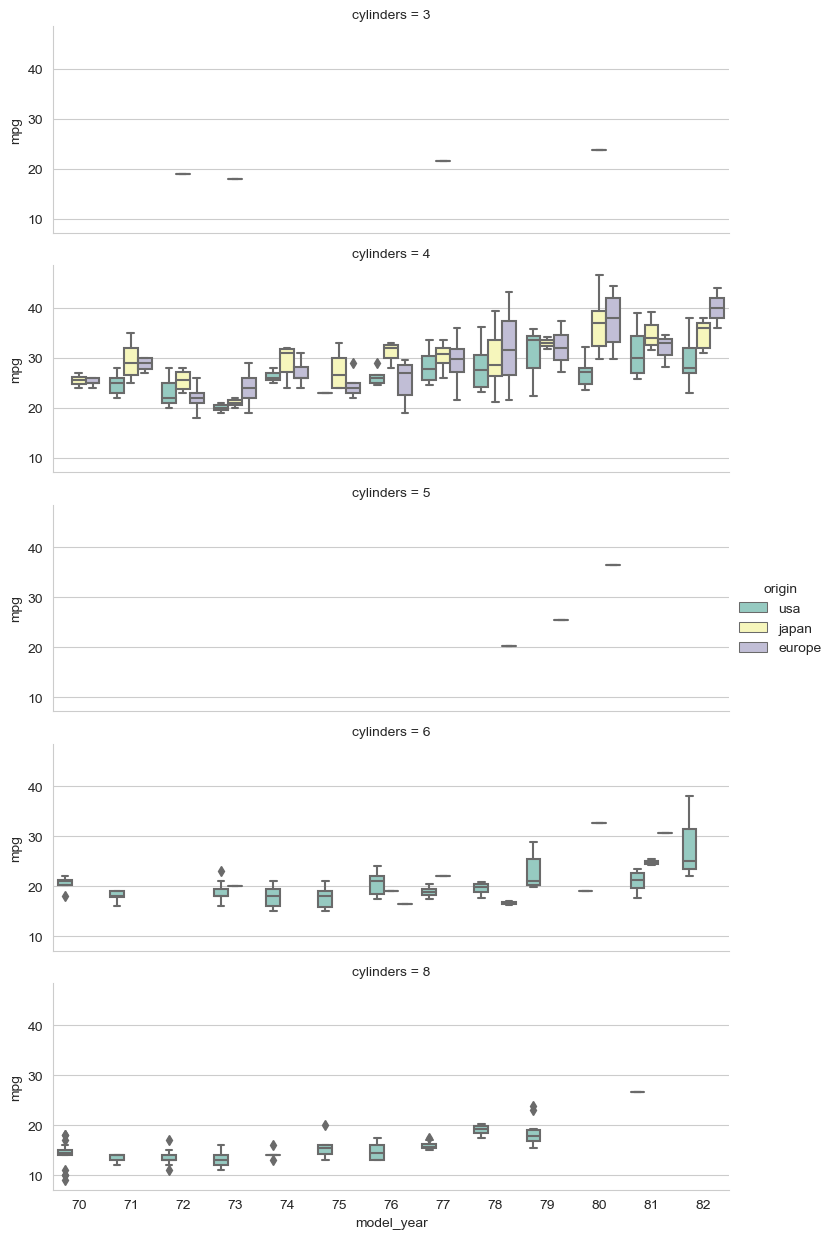

In [4]:
# Ponemos matplotlib inline para asegurarnos de que los gráficos se muestren en el notebook

import seaborn as sns
%matplotlib inline

boxplots_facetados_filas = None

# YOUR CODE HERE
mpg_df = sns.load_dataset("mpg")

boxplots_facetados_filas = sns.catplot(
    x="model_year",
    y="mpg",
    hue="origin",
    row="cylinders",
    data=mpg_df,
    kind="box",
    height=2.5,
    aspect=3,
    palette="Set3"
)

raise NotImplementedError()

In [5]:
import seaborn as sns
assert(isinstance(boxplots_facetados_filas, sns.axisgrid.FacetGrid))
assert(boxplots_facetados_filas.row_names == [3, 4, 5, 6, 8])
assert(boxplots_facetados_filas.axes_dict[3].get_title() == "cylinders = 3" and
       boxplots_facetados_filas.axes_dict[3].get_ylabel() == "mpg")
assert(boxplots_facetados_filas.axes_dict[8].get_title() == "cylinders = 8" and
       boxplots_facetados_filas.axes_dict[8].get_xlabel() == "model_year")

(b) **(1.25 puntos)** Un histograma de la variable mpg, desagregada por colores por país de fabricación (en realidad serán 3 histogramas superpuestos en las mismas barras, donde cada histograma tendrá un color de barras). Guardar el resultado en la variable `hist_mpg_pais`.
* PISTA: utiliza `displot` con el argumento `multiple = "stack"` y usando como argumento `hue` el país de fabricación

In [ ]:
hist_mpg_pais = None

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(hist_mpg_pais.ax.get_xlabel() == "mpg")

(c) **(2.5 puntos)** Dibujar un gráfico de dispersión (scatterplot) de las variables `mpg` (eje X) y `horsepower` (eje Y) mostrando los puntos de cada país con un color distinto, además de los histogramas en los dos ejes. Guardar el resultado en la variable `scatter_conjunto`.

In [ ]:
scatter_conjunto = None

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(scatter_conjunto.hue.name == "origin" and 
       scatter_conjunto.x.name == "mpg" and
       scatter_conjunto.y.name == "horsepower")